### <left> High-Dimensional Deep Learning - 5A
## <center>*Mini-project n° 3 – SSL for Anomaly Detection*</center>
### <center>2024-2025</center>
<div style="text-align: right;">
    <b>Project 3/4</b><br>
<div style="text-align: left;">
<b>Noms :</b> Maïmouna Gadji, Phuc-Luan Nguyen, Maddie Perez et Julia Soufflet<br>

### Objectif : 

L'objectif de ce projet est de 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import  random
import shutil
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# Training images
pathb="./MVTec_AD/bottle"
pathh = "./MVTec_AD/hazelnut"
pathc = "./MVTec_AD/capsule"
patht = "./MVTec_AD/toothbrush"
pathw = "./engine_wiring"

In [3]:
# Training images
train_filenames_bottle = os.listdir(pathb + "/train/good")
train_filenames_hazelnut = os.listdir(pathh + "/train/good")
train_filenames_capsule = os.listdir(pathc + "/train/good")
train_filenames_toothbrush = os.listdir(patht + "/train/good")
train_filenames_W = os.listdir(pathw + "/train/good")
#Création des labels
train_categories_B = []
for filename in train_filenames_bottle:
    train_categories_B.append(0)

train_categories_H = []
for filename in train_filenames_hazelnut:
    train_categories_H.append(0)

train_categories_C = []
for filename in train_filenames_capsule:
    train_categories_C.append(0)

train_categories_T = []
for filename in train_filenames_toothbrush:
    train_categories_T.append(0)

train_categories_W = []
for filename in train_filenames_W:
    train_categories_W.append(0)

In [4]:
import os
import shutil

def reorganize_images_good(source_dirs, target_dir):
    """
    Cette fonction regroupe les images des différents dossiers (good et défauts) et les renomme avec des noms uniques.
    
    :param source_dirs: Liste des chemins vers les dossiers à traiter (good et les dossiers défauts)
    :param target_dir: Dossier où toutes les images seront regroupées et renommées
    """
    # Crée le dossier cible uniquement s'il n'existe pas déjà
    os.makedirs(target_dir, exist_ok=True)
    
    count = 1  # Compteur pour nommer les fichiers de manière unique

    # Parcours chaque dossier dans la liste source_dirs
    for source_dir in source_dirs:
        for filename in os.listdir(source_dir):
            file_path = os.path.join(source_dir, filename)
            
            # Vérifie si c'est un fichier image (vous pouvez étendre les types de fichiers si nécessaire)
            if os.path.isfile(file_path) and filename.endswith(('.png')):
                # Nouveau nom basé sur le compteur
                new_name = f"good{str(count).zfill(3)}.png"  # 001.png, 002.png, etc.
                target_path = os.path.join(target_dir, new_name)
                
                # Vérifie si le fichier existe déjà dans le dossier cible
                if not os.path.exists(target_path):
                    # Copie le fichier vers le dossier cible avec le nouveau nom
                    shutil.copy(file_path, target_path)
                    
                    # Incrémente le compteur pour le prochain fichier
                    count += 1
                
                
def reorganize_images_default(source_dirs, target_dir):
    """
    Cette fonction regroupe les images des différents dossiers (good et défauts) et les renomme avec des noms uniques.
    
    :param source_dirs: Liste des chemins vers les dossiers à traiter (good et les dossiers défauts)
    :param target_dir: Dossier où toutes les images seront regroupées et renommées
    """
    # Crée le dossier cible uniquement s'il n'existe pas déjà
    os.makedirs(target_dir, exist_ok=True)
    
    count = 1  # Compteur pour nommer les fichiers de manière unique

    # Parcours chaque dossier dans la liste source_dirs
    for source_dir in source_dirs:
        for filename in os.listdir(source_dir):
            file_path = os.path.join(source_dir, filename)
            
            # Vérifie si c'est un fichier image (vous pouvez étendre les types de fichiers si nécessaire)
            if os.path.isfile(file_path) and filename.endswith(('.png')):
                # Nouveau nom basé sur le compteur
                new_name = f"default{str(count).zfill(3)}.png"  # 001.png, 002.png, etc.
                target_path = os.path.join(target_dir, new_name)
                
                # Vérifie si le fichier existe déjà dans le dossier cible
                if not os.path.exists(target_path):
                    # Copie le fichier vers le dossier cible avec le nouveau nom
                    shutil.copy(file_path, target_path)
                    
                    # Incrémente le compteur pour le prochain fichier
                    count += 1
                


In [5]:
# Test bottle
source_dirs_D = [
    pathb+'/test/contamination',
    pathb+'/test/broken_small',
    pathb+'/test/broken_large'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathb+'/test/good',  # Dossier 'good'
 ]

target_dirB = pathb +'/test/test/'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirB)
reorganize_images_default(source_dirs_D, target_dirB)

#Création des labels
test_filenames_B = os.listdir(target_dirB)
test_categories_B = []
for filename in test_filenames_B:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_B.append(1)
    else:
        test_categories_B.append(0)

In [6]:
# Test hazelnut
source_dirs_D = [
    pathh+'/test/crack',
    pathh+'/test/cut',
    pathh+'/test/print',
    pathh+'/test/hole'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathh+'/test/good',  # Dossier 'good'
 ]

target_dirH = pathh +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirH)
reorganize_images_default(source_dirs_D, target_dirH)

#Création des labels
test_filenames_H = os.listdir(target_dirH)
test_categories_H = []
for filename in test_filenames_H:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_H.append(1)
    else:
        test_categories_H.append(0)

In [7]:
# Test capsule
source_dirs_D = [
    pathc+'/test/crack',
    pathc+'/test/faulty_imprint',
    pathc+'/test/poke',
    pathc+'/test/scratch',
    pathc+'/test/squeeze'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathc+'/test/good',  # Dossier 'good'
 ]

target_dirC = pathc +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirC)
reorganize_images_default(source_dirs_D, target_dirC)

#Création des labels
test_filenames_C = os.listdir(target_dirC)
test_categories_C = []
for filename in test_filenames_C:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_C.append(1)
    else:
        test_categories_C.append(0)

In [8]:
# Test toothbrush
source_dirs_D = [
    patht+'/test/defective'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    patht+'/test/good',  # Dossier 'good'
 ]

target_dirT = patht +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirT)
reorganize_images_default(source_dirs_D, target_dirT)

#Création des labels
test_filenames_T = os.listdir(target_dirT)
test_categories_T = []
for filename in test_filenames_T:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_T.append(1)
    else:
        test_categories_T.append(0)

In [9]:
# Test engine wiring
source_dirs_D = [
    pathw+'/test/blue_hoop',
    pathw+'/test/cardboard',
    pathw+'/test/fastening',
    pathw+'/test/multiple',
    pathw+'/test/obstruction'# Dossier avec des défauts (Auto_VI)
 
]

source_dirs_G = [
    pathw+'/test/good',  # Dossier 'good'
 ]

target_dirW = pathw +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirW)
reorganize_images_default(source_dirs_D, target_dirW)

#Création des labels
test_filenames_W = os.listdir(target_dirW)
test_categories_W = []
for filename in test_filenames_W:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_W.append(1)
    else:
        test_categories_W.append(0)

Chargement et prétraitement des images de chaque catégorie à partir des dataframes correspondant. Les tailles des données sont standardisées au format 128x128 pixels. Cette uniformisation est nécessaire pour que les données soient compatibles avec les modèles d'apprentissage, et s'assurer de la cohérence des entrées.

In [10]:
from PIL import Image
# Transformation pour redimensionner et convertir en tenseur
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Redimensionnement à 128x128
    transforms.ToTensor(),         # Conversion en tenseur
])

# Création d'un Dataset personnalisé pour vos images
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['filename']
        label = row['category']
        
        # Charger l'image
        image = Image.open(img_path).convert('RGB')  # Assurez-vous que l'image est en mode RGB
        
        # Appliquer les transformations
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [11]:
# Training images
total_train_df_bottle = pd.DataFrame({
    'filename': train_filenames_bottle,
    'category': train_categories_B
})
# Test images
test_df_bottle = pd.DataFrame({
    'filename': test_filenames_B,
    'category': test_categories_B
})
# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_bottle['filename'] = total_train_df_bottle['filename'].apply(lambda x: os.path.join(pathb+'/train/good', x))
test_df_bottle['filename'] = test_df_bottle['filename'].apply(lambda x: os.path.join(target_dirB, x))

In [12]:
print(f"Number of training samples: {len(total_train_df_bottle)}")
print(f"Number of test samples: {len(test_df_bottle)}")

Number of training samples: 209
Number of test samples: 83


In [13]:
# Appliquez les transformations à vos DataFrames d'entraînement et de test
train_dataset_bottle = CustomDataset(total_train_df_bottle, transform=transform)
test_dataset_bottle = CustomDataset(test_df_bottle, transform=transform)

# DataLoaders
train_loader_bottle = DataLoader(train_dataset_bottle, batch_size=32, shuffle=True)
test_loader_bottle = DataLoader(test_dataset_bottle, batch_size=32, shuffle=False)

# Affichage pour vérifier que les transformations sont appliquées
for images, labels in train_loader_bottle:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break


Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [14]:
# Test manuel de la conversion RGB -> Grayscale
images, _ = next(iter(test_loader_bottle))  # Prenez un lot d'images depuis le DataLoader
print(f"Original images shape: {images.shape}")  # [Batch, 3, 128, 128]

# Conversion manuelle
grayscale_x = images.mean(dim=1, keepdim=True)  # Conversion RGB → Grayscale
print(f"Converted grayscale shape: {grayscale_x.shape}")  # [Batch, 1, 128, 128]


Original images shape: torch.Size([32, 3, 128, 128])
Converted grayscale shape: torch.Size([32, 1, 128, 128])


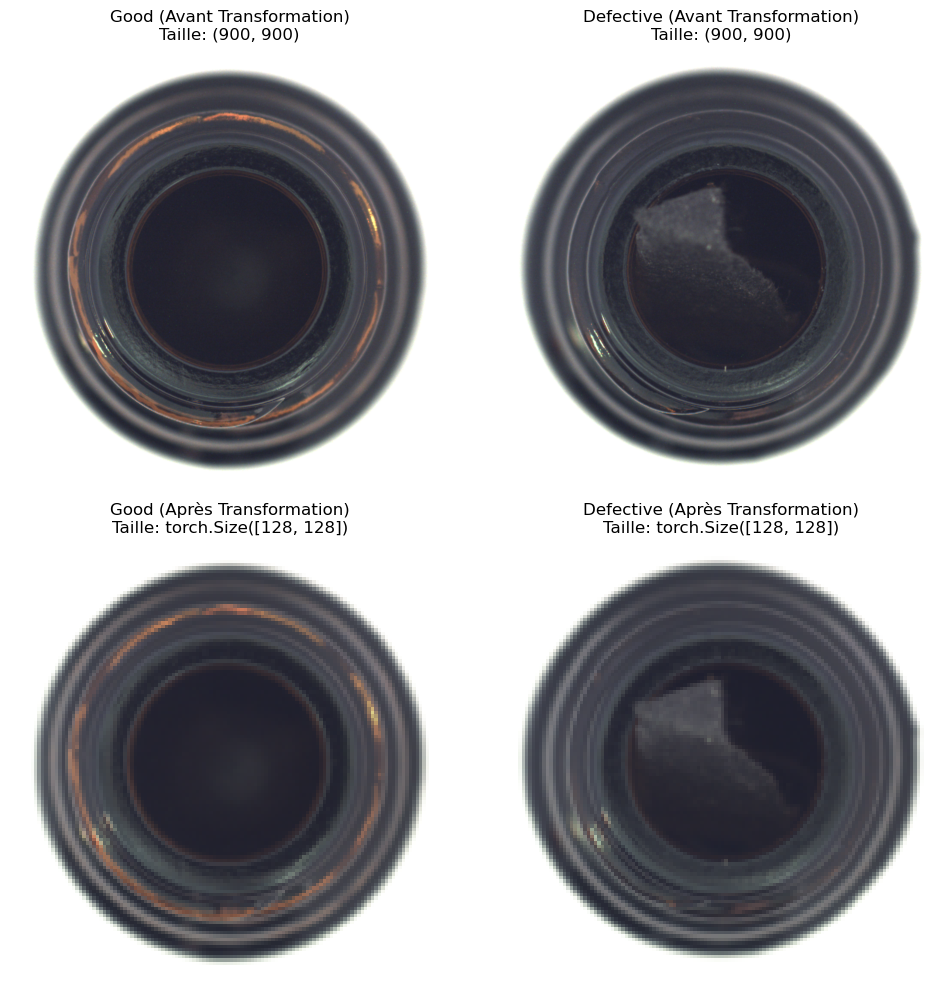

In [15]:
def afficher_image_avec_transformations(dataset, transform, index_good, index_defective):
    """
    Affiche une image "good" et une image "défectueuse" avant et après transformation,
    ainsi que leurs dimensions respectives.

    :param dataset: Dataset brut (DataFrame ou dossier contenant les images)
    :param transform: Transformation à appliquer
    :param index_good: Index de l'image "good" à afficher
    :param index_defective: Index de l'image "défectueuse" à afficher
    """
    # Sélection d'une image good et une défectueuse depuis le DataFrame
    path_good = dataset.iloc[index_good]['filename']
    path_defective = dataset.iloc[index_defective]['filename']

    # Chargement brut des images
    image_good_raw = Image.open(path_good).convert('RGB')
    image_defective_raw = Image.open(path_defective).convert('RGB')

    # Dimensions avant transformation
    size_good_raw = image_good_raw.size
    size_defective_raw = image_defective_raw.size

    # Application des transformations
    image_good_transformed = transform(image_good_raw)
    image_defective_transformed = transform(image_defective_raw)

    # Dimensions après transformation
    size_good_transformed = image_good_transformed.shape[-2:]  # (Height, Width)
    size_defective_transformed = image_defective_transformed.shape[-2:]  # (Height, Width)

    # Conversion des tenseurs en format compatible avec Matplotlib
    image_good_transformed_np = image_good_transformed.permute(1, 2, 0).numpy()
    image_defective_transformed_np = image_defective_transformed.permute(1, 2, 0).numpy()

    # Création des sous-plots pour afficher les images
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Avant transformation
    axes[0, 0].imshow(image_good_raw)
    axes[0, 0].set_title(f"Good (Avant Transformation)\nTaille: {size_good_raw}")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(image_defective_raw)
    axes[0, 1].set_title(f"Defective (Avant Transformation)\nTaille: {size_defective_raw}")
    axes[0, 1].axis("off")

    # Après transformation
    axes[1, 0].imshow(image_good_transformed_np)
    axes[1, 0].set_title(f"Good (Après Transformation)\nTaille: {size_good_transformed}")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(image_defective_transformed_np)
    axes[1, 1].set_title(f"Defective (Après Transformation)\nTaille: {size_defective_transformed}")
    axes[1, 1].axis("off")

    # Ajustement de l'espacement
    plt.tight_layout()
    plt.show()


# Afficher une image "good" et une "défectueuse" pour Bottle
index_good = 0  # Index de la première image "good" dans total_train_df_bottle
index_defective = next(i for i, x in enumerate(test_df_bottle['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_bottle, transform, index_good, index_defective)


In [16]:
# Training images
total_train_df_hazelnut = pd.DataFrame({
    'filename': train_filenames_hazelnut,
    'category': train_categories_H
})

# Test images
test_df_hazelnut = pd.DataFrame({
    'filename': test_filenames_H,
    'category': test_categories_H
})


# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_hazelnut['filename'] = total_train_df_hazelnut['filename'].apply(lambda x: os.path.join(pathh+'/train/good', x))
test_df_hazelnut['filename'] = test_df_hazelnut['filename'].apply(lambda x: os.path.join(target_dirH, x))

In [17]:
print(f"Number of training samples: {len(total_train_df_hazelnut)}")
print(f"Number of test samples: {len(test_df_hazelnut)}")

Number of training samples: 391
Number of test samples: 110


In [18]:
train_dataset_hazelnut = CustomDataset(total_train_df_hazelnut, transform=transform)
test_dataset_hazelnut = CustomDataset(test_df_hazelnut, transform=transform)

train_loader_hazelnut = DataLoader(train_dataset_hazelnut, batch_size=32, shuffle=True)
test_loader_hazelnut = DataLoader(test_dataset_hazelnut, batch_size=32, shuffle=False)

for images, labels in train_loader_hazelnut:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


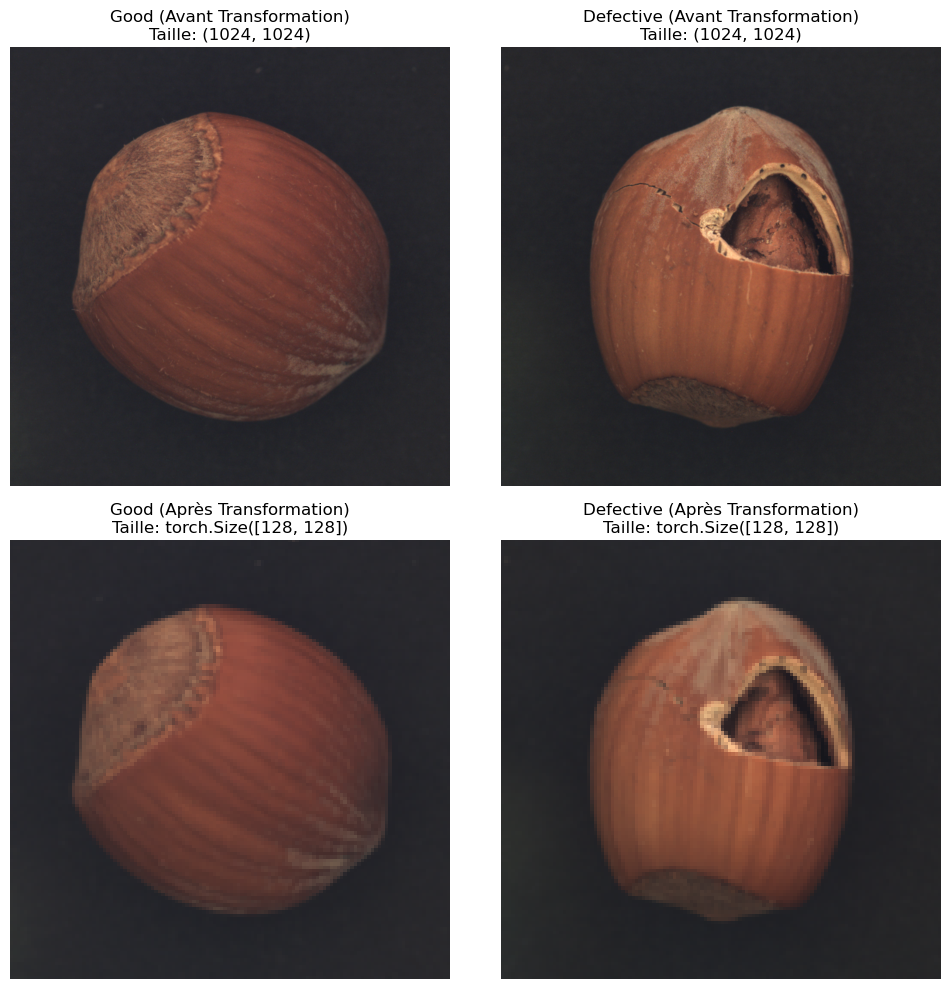

In [19]:
# Afficher une image "good" et une "défectueuse" pour Hazelnut
index_good = 0  # Index de la première image "good"
index_defective = next(i for i, x in enumerate(test_df_hazelnut['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_hazelnut, transform, index_good, index_defective)

In [20]:
# Training images
total_train_df_capsule = pd.DataFrame({
    'filename': train_filenames_capsule,
    'category': train_categories_C
})

# Test images
test_df_capsule = pd.DataFrame({
    'filename': test_filenames_C,
    'category': test_categories_C
})

# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_capsule['filename'] = total_train_df_capsule['filename'].apply(lambda x: os.path.join(pathc+'/train/good', x))
test_df_capsule['filename'] = test_df_capsule['filename'].apply(lambda x: os.path.join(target_dirC, x))

In [21]:
print(f"Number of training samples: {len(total_train_df_capsule)}")
print(f"Number of test samples: {len(test_df_capsule)}")

Number of training samples: 219
Number of test samples: 132


In [22]:
train_dataset_capsule = CustomDataset(total_train_df_capsule, transform=transform)
test_dataset_capsule = CustomDataset(test_df_capsule, transform=transform)

train_loader_capsule = DataLoader(train_dataset_capsule, batch_size=32, shuffle=True)
test_loader_capsule = DataLoader(test_dataset_capsule, batch_size=32, shuffle=False)

for images, labels in train_loader_capsule:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


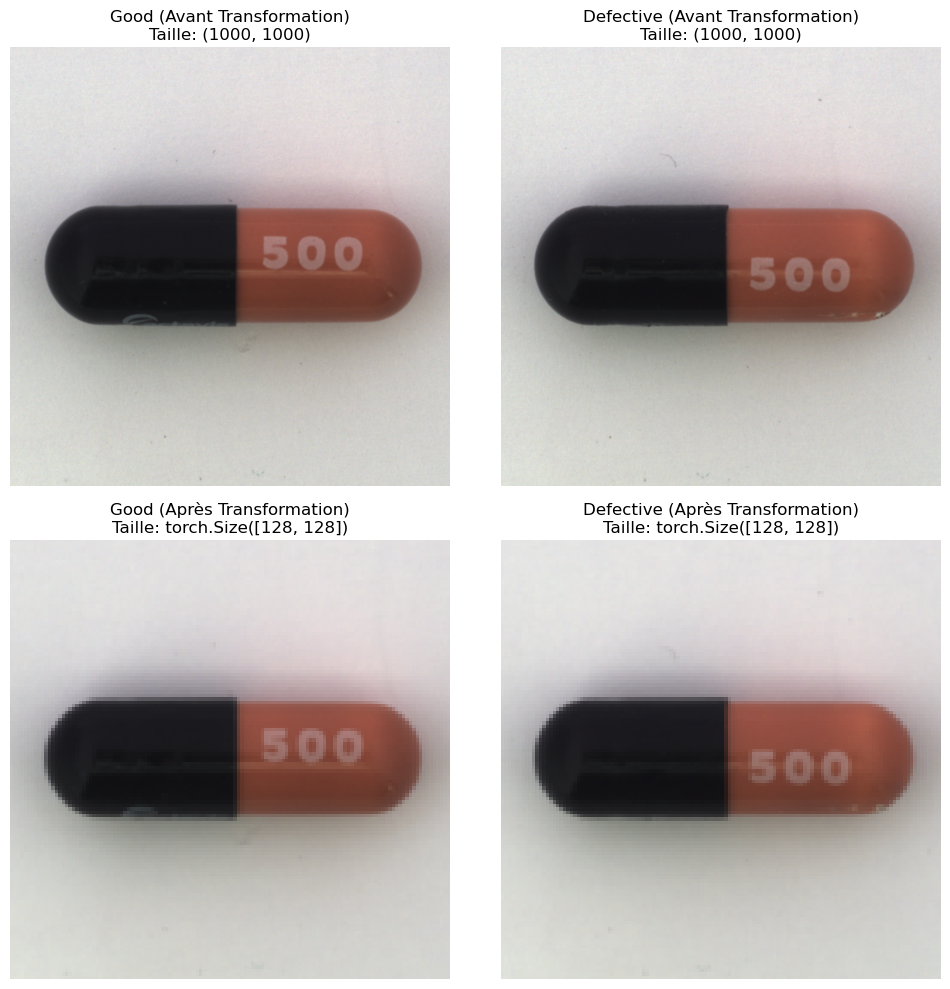

In [23]:
# Afficher une image "good" et une "défectueuse" pour Capsule
index_good = 0  # Index de la première image "good" 
index_defective = next(i for i, x in enumerate(test_df_capsule['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_capsule, transform, index_good, index_defective)

In [24]:
# Training images
total_train_df_toothbrush = pd.DataFrame({
    'filename': train_filenames_toothbrush,
    'category': train_categories_T
})

# Test images
test_df_toothbrush = pd.DataFrame({
    'filename': test_filenames_T,
    'category': test_categories_T
})


# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_toothbrush['filename'] = total_train_df_toothbrush['filename'].apply(lambda x: os.path.join(patht+'/train/good', x))
test_df_toothbrush['filename'] = test_df_toothbrush['filename'].apply(lambda x: os.path.join(target_dirT, x))

In [25]:
print(f"Number of training samples: {len(total_train_df_toothbrush)}")
print(f"Number of test samples: {len(test_df_toothbrush)}")

Number of training samples: 60
Number of test samples: 42


In [26]:

train_dataset_toothbrush = CustomDataset(total_train_df_toothbrush, transform=transform)
test_dataset_toothbrush = CustomDataset(test_df_toothbrush, transform=transform)

train_loader_toothbrush = DataLoader(train_dataset_toothbrush, batch_size=32, shuffle=True)
test_loader_toothbrush = DataLoader(test_dataset_toothbrush, batch_size=32, shuffle=False)

for images, labels in train_loader_toothbrush:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


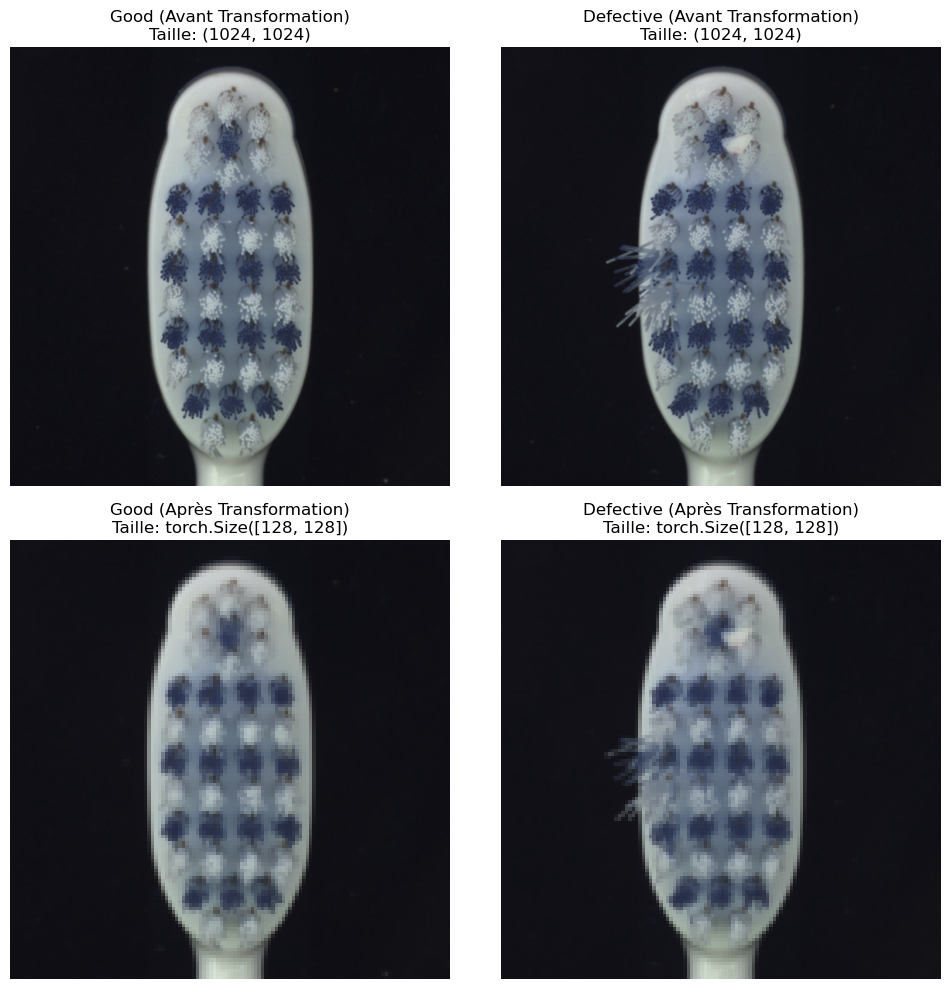

In [27]:
# Afficher une image "good" et une "défectueuse" pour Toothbrush
index_good = 0  # Index de la première image "good" 
index_defective = next(i for i, x in enumerate(test_df_toothbrush['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_toothbrush, transform, index_good, index_defective)

In [28]:
# Training images
total_train_df_W = pd.DataFrame({
    'filename': train_filenames_W,
    'category': train_categories_W
})

# Test images
test_df_W = pd.DataFrame({
    'filename': test_filenames_W,
    'category': test_categories_W
})

# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_W['filename'] = total_train_df_W['filename'].apply(lambda x: os.path.join(pathw+'/train/good', x))
test_df_W['filename'] = test_df_W['filename'].apply(lambda x: os.path.join(target_dirW, x))


In [29]:
print(f"Number of training samples: {len(total_train_df_W)}")
print(f"Number of test samples: {len(test_df_W)}")

Number of training samples: 285
Number of test samples: 607


In [30]:
train_dataset_engine = CustomDataset(total_train_df_W, transform=transform)
test_dataset_engine = CustomDataset(test_df_W, transform=transform)

train_loader_engine = DataLoader(train_dataset_engine, batch_size=32, shuffle=True)
test_loader_engine = DataLoader(test_dataset_engine, batch_size=32, shuffle=False)

for images, labels in train_loader_engine:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


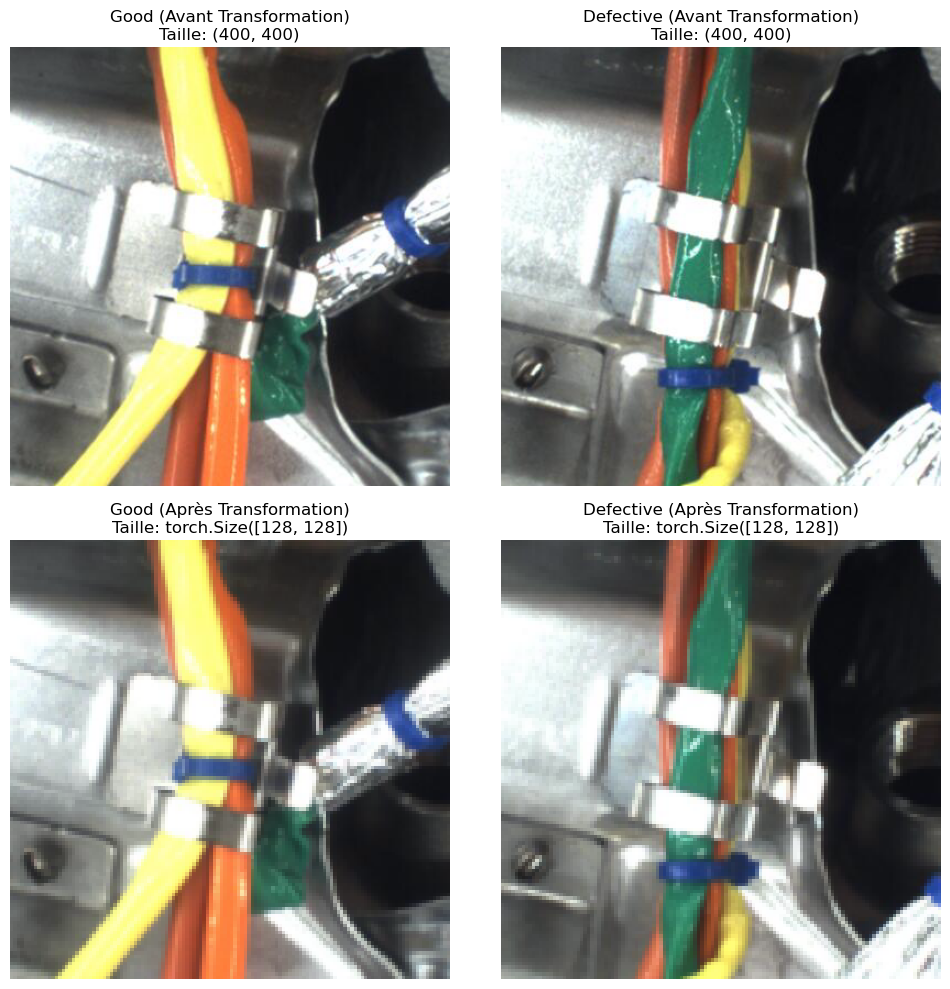

In [31]:
# Afficher une image "good" et une "défectueuse" pour Toothbrush
index_good = 0  # Index de la première image "good" 
index_defective = next(i for i, x in enumerate(test_df_W['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_W, transform, index_good, index_defective)

# I - Partie 1 : Train SSL

### Notre architecture 


#### 1) Encoder (encodeur)

L'encodeur a pour objectif de transformer l'image d'entrée en une représentation de dimension inférieure, souvent appelée latent space ou espace latent. L'encodeur ici utilise des couches convolutionnelles pour extraire progressivement des caractéristiques de plus en plus abstraites à partir des pixels de l'image.

Convolutionnal Layers (Couches Convolutionnelles) : L'encodeur utilise plusieurs couches convolutionnelles (nn.Conv2d) avec un noyau de taille 4x4, un stride de 2 et un padding de 1. Le stride de 2 dans chaque couche permet d'augmenter le nombre de canaux, et réduit la résolution spatiale de l'image (par exemple de 32x32 à 16x16, puis de 16x16 à 8x8, etc.). Cela permet de capturer des informations de plus en plus abstraites tout en conservant un contexte spatial. Cela est fait progressivement entre chaque activation car différents niveaux d'abstractions considéreront différents features (pattern et structure) comme important : nous extrayons donc des informations différentes. 
Les activations ReLU introduisent de la non-linéarité et aider à modéliser des relations plus complexes entre les pixels, sa présence permet aussi d'éviter le problème du vanishing gradient qui affecte certaines autres fonctions d'activation comme la sigmoïde ou tanh.

#### 2) Latent Dimension :
La dernière couche convolutionnelle produit une sortie de taille latent_dim (ici 128), qui correspond à l'espace latent. IL s'agit d'une representation simplifiée de l'image, qui ne retient que les détails les plus importants, filtrés par l'encodeur.


#### 3) Decoder (décodeur):
Le rôle du décodeur est de reconstruire l'image originale à partir de la représentation comprimée dans l'espace latent. Le décodeur utilise des couches de convolution transposée (ou déconvolution) pour effectuer cette tâche.

Transposed Convolutional Layers (Couches de Convolution Transposée) :,Le décodeur utilise des couches nn.ConvTranspose2d pour augmenter la résolution de l'image et ramener la dimension de l'espace latent vers la taille d'entrée originale. Chaque couche applique une opération de convolution transposée avec un stride de 2 et un padding de 1, ce qui permet d'agrandir la dimension spatiale de l'image à chaque étape, et donc d'étirer l'information présente dans l'espace latent pour la reconstruction. Le stride de 2 inverse l'effet du stride dans l'encodeur, augmentant ainsi progressivement la taille de l'image (par exemple de 2x2 à 4x4, puis de 4x4 à 8x8, etc.).

Activations ReLU et Sigmoid : ReLU est utilisé pour les couches intermédiaires pour introduire de la non-linéarité, ce qui aide à capturer des relations plus complexes entre les pixels et donc à la reconstruction de l'image. La dernière couche utilise Sigmoid pour limiter les valeurs de sortie entre 0 et 1, pour correspondre à la plage des valeurs de pixels dans les images, normalisées entre [0, 1]
   

In [32]:
class Encoder(nn.Module):
    def __init__(self, in_channels=3, latent_dim=128):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),  # 32x32 -> 16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 16x16 -> 8x8
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 8x8 -> 4x4
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),  # 4x4 -> 2x2
            nn.ReLU(),
            nn.Conv2d(512, latent_dim, kernel_size=4, stride=2, padding=1),  
            nn.ReLU(),
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=128, out_channels=3):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, kernel_size=4, stride=2, padding=1),  # 
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # 2x2 -> 4x4
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, out_channels, kernel_size=4, stride=2, padding=1),  # 16x16 -> 32x32
            nn.Sigmoid(),  # Limiter les valeurs entre [0, 1]
        )

    def forward(self, x):
        return self.decoder(x)

In [33]:
def train_ssl_model(model, train_loader, test_loader, criterion, optimizer, device=device, epochs=5):
    model.to(device)
    for epoch in range(epochs):
        # Mode entraînement
        model.train()
        total_train_loss = 0
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()

            # Forward
            output, grayscale = model(images)
            loss = criterion(output, images)

            # Backpropagation
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        # Moyenne des pertes d'entraînement
        avg_train_loss = total_train_loss / len(train_loader)

        # Mode évaluation
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for images, _ in test_loader:
                images = images.to(device)
                output, grayscale = model(images)
                val_loss = criterion(output, images)
                total_val_loss += val_loss.item()

        # Moyenne des pertes de validation
        avg_val_loss = total_val_loss / len(test_loader)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    return model

### Initialisation des poids

#### 1) Couches de convolution

Les principaux problèmes pouvant nuire à l'apprentissage sont ceux de vanishing ou d'exploding gradient. Dans le cas des vanishing gradients, les gradients deviennent trop petits pour que les poids des couches profondes soient mis à jour au fil des itérations, ce qui ralentit considérablement l'apprentissage, voir empêche le modèle d'apprendre des représentations efficaces. À l'inverse, les gradients sont qualifiés d'exploding gradients lorsqu'ils prennent des valeurs trop grandes, ce qui rend l'entraînement instable et conduit souvent à une divergence du modèle : les poids deviennent trop grands pour être contrôlés. 
Pour éviter cela, il convient d'initialiser les poids de façon pertinente. 
Étant donné que nos fonctions d'activation sont de type ReLU, la méthode d'initialisation la plus adaptée est celle de type He (*kaiming_normal_*). Elle génère des valeurs de poids selon une distribution normale centrée et dont la variance dépend de la taille du noyau de convolution (nombre de neurones de la couche précédente). Ainsi, la variance des activations est préservée au fil des couches et les gradients ne peuvent prendre de valeur trop grandes ou trop petites.
Enfin, les biais sont initialisés à zéro car ils ne doivent pas influencer les activations au début de l'entraînement.

#### 2) Couches de batch-normalization

Les poids sont initialisés à 1 et les biais sont initialisés à zéro car ils ne doivent pas influencer les activations au début de l'entraînement.


In [34]:
def initialize_weights(model):
    """
    Initialise les poids du modèle de manière appropriée pour les couches convolutives et de normalisation.
    """
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # Initialisation He pour ReLU
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)  # Initialisation des biais à zéro
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)  # Initialisation des poids à 1 pour BatchNorm
            nn.init.constant_(m.bias, 0)  # Initialisation des biais à zéro


### Pretext task
L'objectif final de nos modèles est la détection d'anomalie. N'ayant pas accès à des données étiquettées, nous devons avoir recours à des pretext task pour entrainer nos modèles, ce qui est au coeur du Self Supervised Learning. 

L'entrainement se déroule ainsi : le dataset d'entrainement est uniquement composé d'images sans anomalies afin que les modèles apprennent les features qui constitue une donnée conforme : le décodeur parviendra alors facilement à reconstruire l'image initiale à partir de la représentation latente générée par l'encodeur. 
Lors du test puis du déploiement du modèle, on s'attendra à ce que le modèle ait des difficultés à reconstruire correctement l'image (en particulière, l'anomalie ne sera certainement pas correctement représentée). L'erreur de reconstruction sera donc grande, et c'est cette valeur qui servira d'indicateur pour déterminer si l'entrée est conforme (en fonction d'un certain seuil, à déterminer pour chaque cas).


## Pretext tasks 1 : colorizing model

La première pretext task que nous proposons de mettre en place est une méthode de Colorization. Celle-ci consiste à utiliser un autoencodeur pour coloriser des images, donnée en entrée en niveaux de gris. L'encodeur va extraire les caractéristiques de l'image en niveaux de gris qui permettront d'en retrouver les couleurs, puis il les compresse dans une représentation latente. Le décodeur reconstruit ensuite l'image en couleur, à partir de cette représentation latente.



In [35]:
class ColorizationModel(nn.Module):
    def __init__(self, latent_dim=128):
        super(ColorizationModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim, in_channels=1)  # L'encodeur attend 1 canal
        self.decoder = Decoder(latent_dim=latent_dim, out_channels=3)  # Le décodeur produit 3 canaux (RGB)

    def forward(self, x):
        if x.shape[1] == 3:  # Si l'entrée est RGB
            grayscale_x = x.mean(dim=1, keepdim=True)  # Conversion RGB -> Grayscale
        elif x.shape[1] == 1:  # Si l'entrée est déjà en niveaux de gris
            grayscale_x = x
        else:  # Si le format est incorrect
            raise ValueError(f"Unexpected number of channels in input: {x.shape[1]}")
        
        
        # Encoder
        z = self.encoder(grayscale_x)
        
        # Decoder
        reconstructed_x = self.decoder(z)
        
        return reconstructed_x, grayscale_x


### Sur MVTec_AD

In [36]:
def Weight_and_train(train_loader, 
                    test_loader):

        # Modèle de colorisation
    colorization_model = ColorizationModel(latent_dim=128)  # Instantiate the colorization model
    initialize_weights(colorization_model)  # Initialisation des poids
    
    
    # Pré-entrainement pour "bottle"
    colorization_model = train_ssl_model(
        colorization_model,
        train_loader,
        test_loader,
        criterion=nn.MSELoss(),
        optimizer=optim.Adam(colorization_model.parameters(), lr=0.001)
    )
    # S'assurer que les paramètres sont sur le même dispositif
    for param in colorization_model.parameters():
        param.device == device, "Les poids ne sont pas sur le bon dispositif"

    return colorization_model

    

In [37]:
print("Training bottle")

# Pré-entrainement pour "bottle"
colorization_model_bottle =  Weight_and_train(train_loader_bottle, test_loader_bottle)


Training bottle
Epoch 1/5, Train Loss: 0.1287, Val Loss: 0.1170
Epoch 2/5, Train Loss: 0.0856, Val Loss: 0.0422
Epoch 3/5, Train Loss: 0.0227, Val Loss: 0.0119
Epoch 4/5, Train Loss: 0.0082, Val Loss: 0.0073
Epoch 5/5, Train Loss: 0.0051, Val Loss: 0.0060


In [42]:
print("Training hazelnut")
colorization_model_hazelnut =  Weight_and_train(train_loader_hazelnut, test_loader_hazelnut)


Training hazelnut
Epoch 1/5, Train Loss: 0.0604, Val Loss: 0.0228
Epoch 2/5, Train Loss: 0.0144, Val Loss: 0.0093
Epoch 3/5, Train Loss: 0.0080, Val Loss: 0.0063
Epoch 4/5, Train Loss: 0.0063, Val Loss: 0.0052
Epoch 5/5, Train Loss: 0.0050, Val Loss: 0.0046


In [43]:
print("Training capsule")
colorization_model_capsule =  Weight_and_train(train_loader_capsule, test_loader_capsule)

print("Training toothbrush")
colorization_model_toothbrush = Weight_and_train(train_loader_toothbrush, test_loader_toothbrush)

Training capsule
Epoch 1/5, Train Loss: 0.0843, Val Loss: 0.0468
Epoch 2/5, Train Loss: 0.0361, Val Loss: 0.0282
Epoch 3/5, Train Loss: 0.0296, Val Loss: 0.0263
Epoch 4/5, Train Loss: 0.0255, Val Loss: 0.0241
Epoch 5/5, Train Loss: 0.0232, Val Loss: 0.0222
Training toothbrush
Epoch 1/5, Train Loss: 0.1364, Val Loss: 0.1233
Epoch 2/5, Train Loss: 0.1074, Val Loss: 0.0742
Epoch 3/5, Train Loss: 0.0676, Val Loss: 0.0396
Epoch 4/5, Train Loss: 0.0358, Val Loss: 0.0254
Epoch 5/5, Train Loss: 0.0243, Val Loss: 0.0196


Avec la technique de colorizing, les resultats sur les brosses à dents sont moins concluants. Cela est normal car les couleurs des brosses à dents sont totalement independantes de leurs formes. Ainsi, une fois en noir et blanc, il est presque impossible d'en retrouver la couleur originale : même la luminosité des pixels ne variera que très peu pour les nuances que nous avons. De plus, les anomalies sur ce produits seront également indépendantes de leurs couleurs, ainsi ce ne sera pas une méthode pertinente à implémenter dans ce cas là.

In [44]:
print("Training engine wiring")
colorization_model_engine = Weight_and_train(train_loader_engine, test_loader_engine)

Training engine wiring
Epoch 1/5, Train Loss: 0.1017, Val Loss: 0.0896
Epoch 2/5, Train Loss: 0.0733, Val Loss: 0.0523
Epoch 3/5, Train Loss: 0.0466, Val Loss: 0.0397
Epoch 4/5, Train Loss: 0.0366, Val Loss: 0.0329
Epoch 5/5, Train Loss: 0.0303, Val Loss: 0.0284


Interprétations.

In [ ]:
def visualize_reconstructions(model, data_loader, device, num_images=5):
    # Assurez-vous que le modèle est sur le bon dispositif
    model.to(device)
    model.eval()

    # Convertir le DataLoader en liste pour échantillonner des images aléatoirement
    dataset = list(data_loader.dataset)

    # Sélectionner aléatoirement `num_images` images du dataset
    random_indices = random.sample(range(len(dataset)), num_images)
    random_images = [dataset[i][0] for i in random_indices]  # Extraire seulement les images

    # Empiler les images dans un batch
    images = torch.stack(random_images).to(device)

    # Faire passer les images dans le modèle
    with torch.no_grad():
        reconstructed_images, grayscale_images = model(images)

    # Déplacer les données sur le CPU pour les visualiser
    images = images.cpu()
    reconstructed_images = reconstructed_images.cpu()
    grayscale_images = grayscale_images.cpu()

    # Visualiser les résultats
    fig, axes = plt.subplots(num_images, 3, figsize=(12, num_images * 4))

    for i in range(num_images):
        # Image en niveaux de gris
        axes[i, 0].imshow(grayscale_images[i].squeeze(), cmap='gray')
        axes[i, 0].set_title("Grayscale Input")
        axes[i, 0].axis('off')

        # Image originale (RGB)
        axes[i, 1].imshow(images[i].permute(1, 2, 0))
        axes[i, 1].set_title("Original Image")
        axes[i, 1].axis('off')

        # Image reconstruite
        axes[i, 2].imshow(reconstructed_images[i].permute(1, 2, 0))
        axes[i, 2].set_title("Reconstructed Image")
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
visualize_reconstructions(colorization_model_bottle, test_loader_bottle, device=device, num_images=2)


In [ ]:
visualize_reconstructions(colorization_model_hazelnut, test_loader_hazelnut, device=device, num_images=2)
visualize_reconstructions(colorization_model_capsule, test_loader_capsule, device=device, num_images=2)
visualize_reconstructions(colorization_model_toothbrush, test_loader_toothbrush, device=device, num_images=2)

### Sur Auto_VI

colorization_model_w = ColorizationModel(latent_dim=128)  # Instantiate the colorization model

# Pré-entrainement pour "engine wiring" (w)
colorization_encoder_w = train_ssl_model(
    colorization_model_w,
    dataloader_train_w,
    dataloader_test_w,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_w.parameters(), lr=0.001)
)

# A AJOUTER *Interprétations*

## Pretext tasks 2 : inpainting model

In [ ]:
class InpaintingModel(nn.Module):
    def __init__(self, latent_dim=128, mask_size=8):
        super(InpaintingModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)
        self.mask_size = mask_size

    def forward(self, x):
        x_masked = self.apply_mask(x)
        z = self.encoder(x_masked)
        return self.decoder(z), x_masked

    def apply_mask(self, x):
        masked_x = x.clone()

        for i in range(masked_x.size(0)):
            ul_x = np.random.randint(0, x.size(2) - self.mask_size + 1)
            ul_y = np.random.randint(0, x.size(3) - self.mask_size + 1)
            masked_x[i, :, ul_x:ul_x+self.mask_size, ul_y:ul_y+self.mask_size] = 0

        return masked_x

### Sur MVTec_AD

In [ ]:
inpainting_model_bottle = InpaintingModel(mask_size=8)
inpainting_encoder_bottle = train_ssl_model(inpainting_model_bottle,
                                     train_loader_bottle,
                                    test_loader_bottle,
                                     criterion=nn.MSELoss(),
                                     optimizer=optim.Adam(inpainting_model_bottle.parameters(), lr=0.001)
                                     )

In [ ]:
print("Training hazelnut")
inpainting_model_hazelnut = InpaintingModel(mask_size=8) 

# Pré-entrainement pour "hazelnut"
inpainting_encoder_h = train_ssl_model(
    inpainting_model_hazelnut,
    train_loader_hazelnut, 
    test_loader_hazelnut,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_hazelnut.parameters(), lr=0.001)
)

print("Training capsule")
inpainting_model_capsule = InpaintingModel(mask_size=8) 

# Pré-entrainement pour "capsule"
inpainting_encoder_c = train_ssl_model(
    inpainting_model_capsule,
    train_loader_capsule,
    test_loader_capsule,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_capsule.parameters(), lr=0.001)
)

print("Training toothbrush")
inpainting_model_toothbrush = InpaintingModel(mask_size=8) 
# Pré-entrainement pour "toothbrush"
inpainting_encoder_t = train_ssl_model(
    inpainting_model_toothbrush,
    train_loader_toothbrush,
    test_loader_toothbrush,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_toothbrush.parameters(), lr=0.001))

Interpretations.

In [ ]:
def visualize_reconstructions(model, data_loader, device, num_images=5):
    # Set the model to evaluation mode
    model.eval()

    # Convert the DataLoader to a list to randomly sample images
    dataset = list(data_loader.dataset)

    # Randomly select `num_images` images from the dataset
    random_indices = random.sample(range(len(dataset)), num_images)
    random_images = [dataset[i][0] for i in random_indices]  # Extract only the images, ignoring labels

    # Stack the images into a batch
    images = torch.stack(random_images)

    # Move images to the specified device
    images = images.to(device)
    print(f"image.shape = {random_images[0].shape}")
    print(f"images = {images.shape}")
    # Run the grayscale images through the colorization model
    with torch.no_grad():
        reconstructed_images, perturbed_images = model(images)

    # Move images back to CPU for visualization
    images = images.cpu()
    reconstructed_images = reconstructed_images.cpu()
    perturbed_images = perturbed_images.cpu()
    print(f"reconstructed_images.shape = {reconstructed_images.shape}")
    print(f"grayscale_images.shape = {perturbed_images.shape}")

    # Plot the grayscale, ground truth, and colorized images
    fig, axes = plt.subplots(num_images, 3, figsize=(10, num_images * 4))
    for i in range(num_images):
        print(f"reconstructed_images[{i}].shape = {reconstructed_images[i].shape}")
        # Grayscale input
        axes[i, 0].imshow(perturbed_images[i].permute(1, 2, 0).squeeze(), cmap='gray')
        axes[i, 0].set_title("Image bruitée")
        axes[i, 0].axis('off')

        # Ground truth (original RGB image)
        axes[i, 1].imshow(images[i].permute(1, 2, 0))
        axes[i, 1].set_title("Image initiale")
        axes[i, 1].axis('off')

        # Colorized output from the model
        axes[i, 2].imshow(reconstructed_images[i].permute(1, 2, 0))
        axes[i, 2].set_title("Image reconstruite")
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
visualize_reconstructions(inpainting_model_bottle, test_loader_bottle, device=device, num_images=5)

### Sur Auto_VI

Abandon stratégique car il ne fonctionne pas au dessus.

## Pretext tasks 3 : masked autoencoder

In [ ]:
class MaskedAutoencoderModel(nn.Module):
    def __init__(self, latent_dim=128, mask_ratio=1/16):
        super(MaskedAutoencoderModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)
        self.mask_ratio = mask_ratio

    def forward(self, x):
        x_masked = self.apply_mask(x)
        z = self.encoder(x_masked)
        return self.decoder(z), x_masked

    def apply_mask(self, x):
        x_masked = x.clone()
        mask = torch.rand_like(x[:, 0, :, :]) < self.mask_ratio
        mask = mask.unsqueeze(1).repeat(1, x.size(1), 1, 1)
        x_masked[mask] = 0
        return x_masked

### Sur MVTec_AD

In [ ]:
mae_model_bottle = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)
mae_encoder_bottle = train_ssl_model(mae_model_bottle,
                              train_loader_bottle,
                                    test_loader_bottle,
                              criterion=nn.MSELoss(),
                              optimizer=optim.Adam(mae_model_bottle.parameters(), lr=0.001)
                              )

In [ ]:
visualize_reconstructions(mae_model_bottle, test_loader_bottle, device=device, num_images=5)

In [ ]:
print("Training hazelnut")
mae_model_hazelnut = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)

# Pré-entrainement pour "hazelnut"
mae_encoder_h = train_ssl_model(
    mae_model_hazelnut,
    train_loader_hazelnut, 
    test_loader_hazelnut,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_hazelnut.parameters(), lr=0.001)
)

print("Training capsule")
mae_model_capsule = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)

# Pré-entrainement pour "capsule"
mae_encoder_c = train_ssl_model(
    mae_model_capsule,
    train_loader_capsule, 
    test_loader_capsule,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_capsule.parameters(), lr=0.001)
)

print("Training toothbrush")
mae_model_toothbrush = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)
# Pré-entrainement pour "toothbrush"
mae_encoder_t = train_ssl_model(
    mae_model_toothbrush,
    train_loader_toothbrush, 
    test_loader_toothbrush,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_toothbrush.parameters(), lr=0.001))

In [ ]:
visualize_reconstructions(mae_model_hazelnut, test_loader_hazelnut, device=device, num_images=3)
visualize_reconstructions(mae_model_capsule, test_loader_capsule, device=device, num_images=3)
visualize_reconstructions(mae_model_toothbrush, test_loader_toothbrush, device=device, num_images=3)

### Sur Auto_VI

# II - Partie 2 :
Use the model loss as an anomaly score and evaluate the anomaly score’s
discriminative power by plotting the ROC curve and the AUROC metric.

## Pour l'inpainting

In [ ]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def calculate_losses(model, dataloader, criterion, device='cpu'):
    """
    Calcule les pertes pour chaque image dans le dataloader.
    """
    model.eval()
    losses = []
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            outputs, _ = model(images)

            # Calcul de la perte par pixel avec réduction "none"
            batch_losses = criterion(outputs, images)
            
            # Vérification des dimensions
            print(f"outputs.shape: {outputs.shape}, images.shape: {images.shape}, batch_losses.shape: {batch_losses.shape}")

            # Si `batch_losses` a une forme [batch_size, channels, height, width]
            if batch_losses.dim() == 4:
                batch_losses_per_image = batch_losses.mean(dim=(1, 2, 3))  # Moyenne par image
            # Si `batch_losses` a une forme [batch_size, feature]
            elif batch_losses.dim() == 2:
                batch_losses_per_image = batch_losses.mean(dim=1)
            # Si `batch_losses` est 1D (par exemple, [batch_size])
            elif batch_losses.dim() == 1:
                batch_losses_per_image = batch_losses
            # Si `batch_losses` est un scalaire (réduction "mean")
            elif batch_losses.dim() == 0:
                raise ValueError(
                    "Loss returned a scalar value. Use reduction='none' to compute losses per image."
                )
            else:
                raise ValueError(f"Unexpected batch_losses shape: {batch_losses.shape}")

            # Ajouter les pertes des images
            losses.extend(batch_losses_per_image.cpu().numpy())

    return np.array(losses)




def plot_roc_curve(losses, labels, class_name):
    fpr, tpr, _ = roc_curve(labels, losses)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {class_name}')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

In [ ]:

# Exemple d'utilisation pour "bottle"
criterion = torch.nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calcul des pertes
losses_b = calculate_losses(inpainting_model_bottle, dataloader_test_b, criterion, device)

# Utilisation des labels déjà définis
labels_b = np.array(test_categories_B)

# Tracé de la courbe ROC et calcul de l'AUROC
auroc_b = plot_roc_curve(losses_b, labels_b, "Bottle")
print(f"AUROC for Bottle: {auroc_b:.2f}")

# Répéter pour hazelnut, capsule et toothbrush
losses_h = calculate_losses(inpainting_model_hazelnut, dataloader_test_h, criterion, device)
labels_h = np.array(test_categories_H)  # Labels pour "hazelnut"
auroc_h = plot_roc_curve(losses_h, labels_h, "Hazelnut")
print(f"AUROC for Hazelnut: {auroc_h:.2f}")

losses_c = calculate_losses(inpainting_model_capsule, dataloader_test_c, criterion, device)
labels_c = np.array(test_categories_C)  # Labels pour "capsule"
auroc_c = plot_roc_curve(losses_c, labels_c, "Capsule")
print(f"AUROC for Capsule: {auroc_c:.2f}")

losses_t = calculate_losses(inpainting_model_toothbrush, dataloader_test_t, criterion, device)
labels_t = np.array(test_categories_T)  # Labels pour "toothbrush"
auroc_t = plot_roc_curve(losses_t, labels_t, "Toothbrush")
print(f"AUROC for Toothbrush: {auroc_t:.2f}")

**pas bon** 

## Pour le masked encoder

**pas bon non plus**

## Pour le colorizing

In [ ]:
# Exemple d'utilisation pour "bottle"
criterion = torch.nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

losses_b = calculate_losses(colorization_model_bottle, test_loader_bottle, criterion, device)
labels_b = np.array(test_categories_B)

# Vérifiez que les longueurs correspondent
assert len(losses_b) == len(labels_b), f"Inconsistent lengths: losses={len(losses_b)}, labels={len(labels_b)}"



"""
# Tracé de la courbe ROC et calcul de l'AUROC
auroc_b = plot_roc_curve(losses_b, labels_b, "Bottle")
print(f"AUROC for Bottle: {auroc_b:.2f}")"""


In [ ]:
# Répéter pour hazelnut, capsule et toothbrush
losses_h = calculate_losses(colorization_model_hazelnut, test_loader_hazelnut, criterion, device)
labels_h = np.array(test_categories_H)  # Labels pour "hazelnut"
auroc_h = plot_roc_curve(losses_h, labels_h, "Hazelnut")
print(f"AUROC for Hazelnut: {auroc_h:.2f}")

losses_c = calculate_losses(colorization_model_capsule, test_loader_capsule, criterion, device)
labels_c = np.array(test_categories_C)  # Labels pour "capsule"
auroc_c = plot_roc_curve(losses_c, labels_c, "Capsule")
print(f"AUROC for Capsule: {auroc_c:.2f}")

losses_t = calculate_losses(colorization_model_toothbrush, test_loader_toothbrush, criterion, device)
labels_t = np.array(test_categories_T)  # Labels pour "toothbrush"
auroc_t = plot_roc_curve(losses_t, labels_t, "Toothbrush")
print(f"AUROC for Toothbrush: {auroc_t:.2f}")

### Maddie tente

Calcul des courbes ROC et AUROC pour bottle


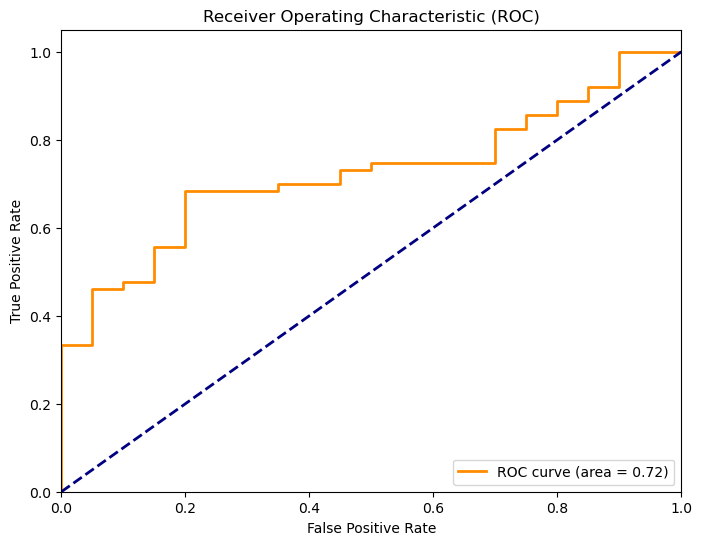

AUROC: 0.72
Calcul des courbes ROC et AUROC pour hazelnut


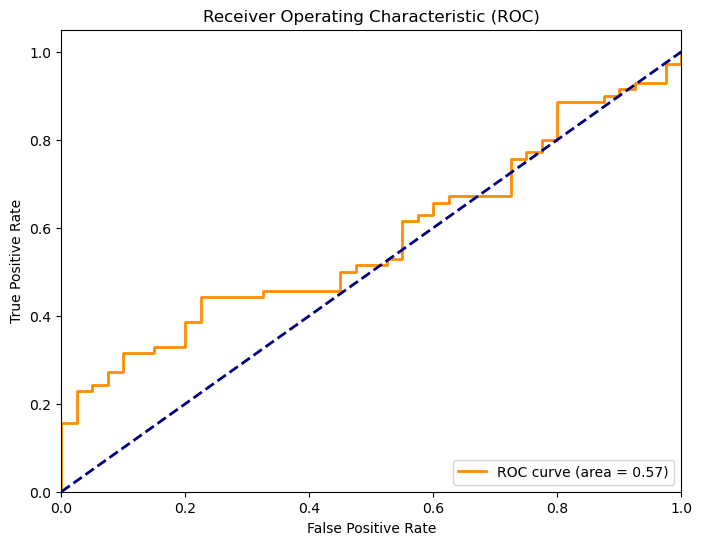

AUROC: 0.57
Calcul des courbes ROC et AUROC pour capsule


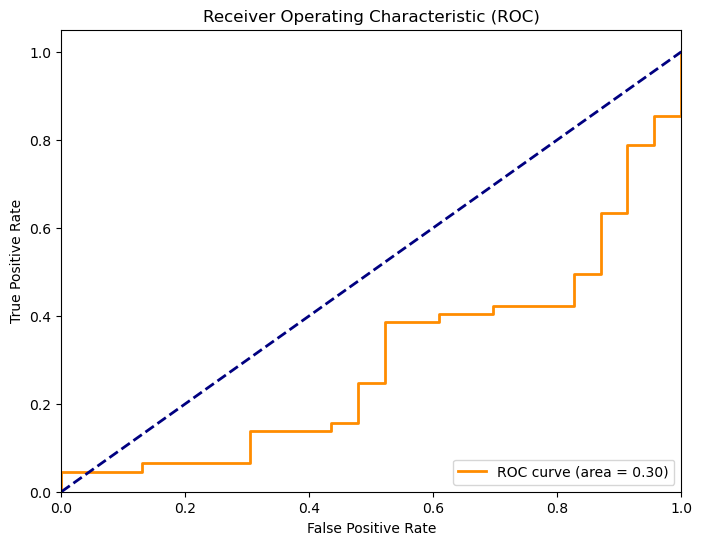

AUROC: 0.30
Calcul des courbes ROC et AUROC pour toothbrush


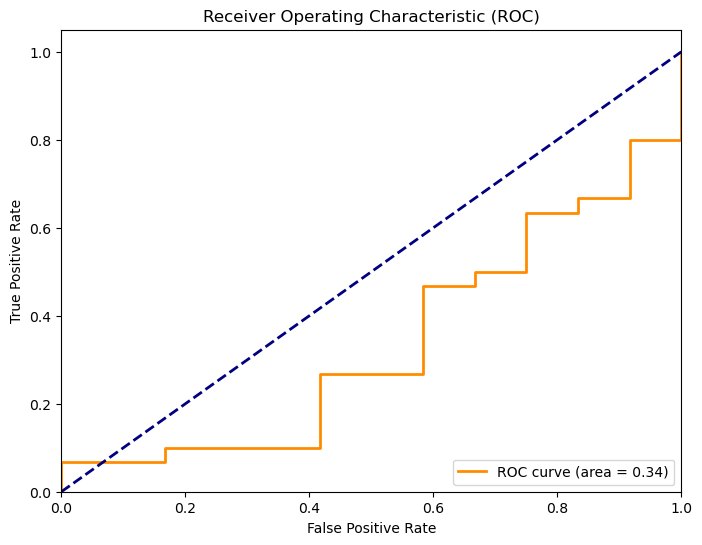

AUROC: 0.34


(array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
        0.41666667, 0.41666667, 0.58333333, 0.58333333, 0.66666667,
        0.66666667, 0.75      , 0.75      , 0.83333333, 0.83333333,
        0.91666667, 0.91666667, 1.        , 1.        ]),
 array([0.        , 0.03333333, 0.06666667, 0.06666667, 0.1       ,
        0.1       , 0.26666667, 0.26666667, 0.46666667, 0.46666667,
        0.5       , 0.5       , 0.63333333, 0.63333333, 0.66666667,
        0.66666667, 0.8       , 0.8       , 1.        ]),
 0.3361111111111111)

In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def compute_roc_and_auc(model, test_loader, device):
    model.eval()
    
    # Liste pour stocker les scores de probabilité et les labels réels
    all_labels = []
    all_scores = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Obtenez la sortie du modèle (réconstruisez les images)
            reconstructed_images, _ = model(images)
            
            # Calcul des erreurs de reconstruction (utiliser l'erreur L2 par exemple)
            reconstruction_errors = torch.norm(reconstructed_images - images, p=2, dim=(1, 2, 3)).cpu().numpy()
            
            all_scores.extend(reconstruction_errors)
            all_labels.extend(labels.cpu().numpy())
    
    # Convertir les labels en format binaire (1 si l'image est correcte, 0 si non)
    # Cela dépend de la définition des labels dans votre cas (ex. bien reconstruit vs mal reconstruit)
    lb = LabelBinarizer()
    all_labels = lb.fit_transform(all_labels)

    # Calculer la courbe ROC et l'AUROC
    fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
    roc_auc = auc(fpr, tpr)

    # Afficher la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    print(f'AUROC: {roc_auc:.2f}')

    return fpr, tpr, roc_auc
    
# Appel pour le modèle "bottle"
print("Calcul des courbes ROC et AUROC pour bottle")
compute_roc_and_auc(colorization_model_bottle, test_loader_bottle, device)

# Appel pour le modèle "hazelnut"
print("Calcul des courbes ROC et AUROC pour hazelnut")
compute_roc_and_auc(colorization_model_hazelnut, test_loader_hazelnut, device)

# Appel pour le modèle "capsule"
print("Calcul des courbes ROC et AUROC pour capsule")
compute_roc_and_auc(colorization_model_capsule, test_loader_capsule, device)

# Appel pour le modèle "toothbrush"
print("Calcul des courbes ROC et AUROC pour toothbrush")
compute_roc_and_auc(colorization_model_toothbrush, test_loader_toothbrush, device)


Calcul des courbes ROC et AUROC pour bottle


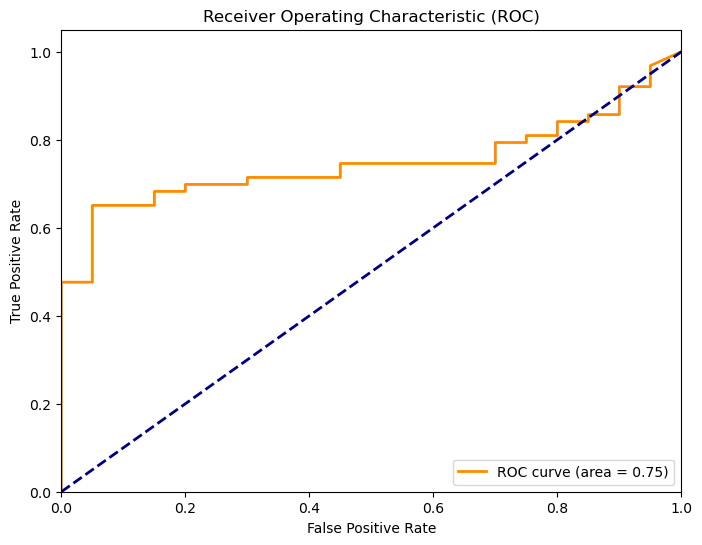

AUROC: 0.75
Calcul des courbes ROC et AUROC pour hazelnut


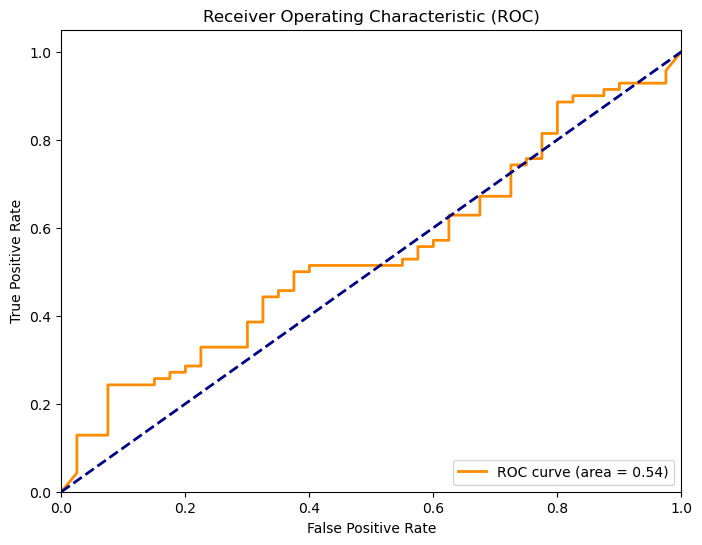

AUROC: 0.54
Calcul des courbes ROC et AUROC pour capsule


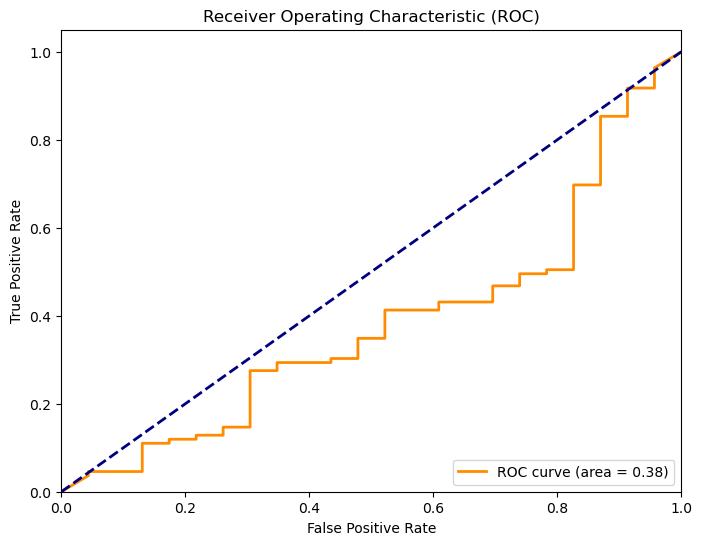

AUROC: 0.38
Calcul des courbes ROC et AUROC pour toothbrush


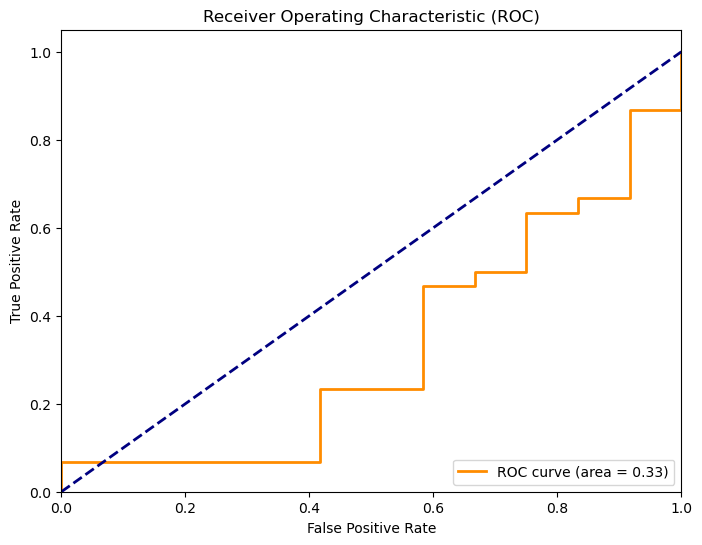

AUROC: 0.33


(array([0.        , 0.        , 0.41666667, 0.41666667, 0.58333333,
        0.58333333, 0.66666667, 0.66666667, 0.75      , 0.75      ,
        0.83333333, 0.83333333, 0.91666667, 0.91666667, 1.        ,
        1.        , 1.        ]),
 array([0.        , 0.06666667, 0.06666667, 0.23333333, 0.23333333,
        0.46666667, 0.46666667, 0.5       , 0.5       , 0.63333333,
        0.63333333, 0.66666667, 0.66666667, 0.86666667, 0.86666667,
        0.93333333, 1.        ]),
 0.3277777777777778)

In [48]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def compute_roc_and_auc(model, test_loader, device):
    model.eval()
    
    # Liste pour stocker les scores de probabilité et les labels réels
    all_labels = []
    all_scores = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Obtenez la sortie du modèle (réconstruisez les images)
            reconstructed_images, _ = model(images)
            
            # Calcul des erreurs de reconstruction (utiliser l'erreur L2 par exemple)
            reconstruction_errors = torch.norm(reconstructed_images - images, p=2, dim=(1, 2, 3)).cpu().numpy()
            
            # Normalisation des erreurs pour les adapter entre 0 et 1
            normalized_scores = (reconstruction_errors - np.min(reconstruction_errors)) / (np.max(reconstruction_errors) - np.min(reconstruction_errors))
            
            all_scores.extend(normalized_scores)
            all_labels.extend(labels.cpu().numpy())
    
    # Convertir les labels en format binaire (1 si l'image est une anomalie)
    lb = LabelBinarizer()
    all_labels = lb.fit_transform(all_labels)

    # Calculer la courbe ROC et l'AUROC
    fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
    roc_auc = auc(fpr, tpr)

    # Afficher la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    print(f'AUROC: {roc_auc:.2f}')

    return fpr, tpr, roc_auc


    
# Appel pour le modèle "bottle"
print("Calcul des courbes ROC et AUROC pour bottle")
compute_roc_and_auc(colorization_model_bottle, test_loader_bottle, device)

# Appel pour le modèle "hazelnut"
print("Calcul des courbes ROC et AUROC pour hazelnut")
compute_roc_and_auc(colorization_model_hazelnut, test_loader_hazelnut, device)

# Appel pour le modèle "capsule"
print("Calcul des courbes ROC et AUROC pour capsule")
compute_roc_and_auc(colorization_model_capsule, test_loader_capsule, device)

# Appel pour le modèle "toothbrush"
print("Calcul des courbes ROC et AUROC pour toothbrush")
compute_roc_and_auc(colorization_model_toothbrush, test_loader_toothbrush, device)

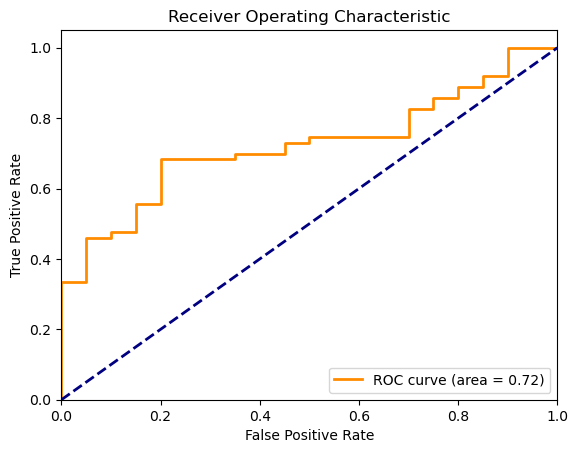

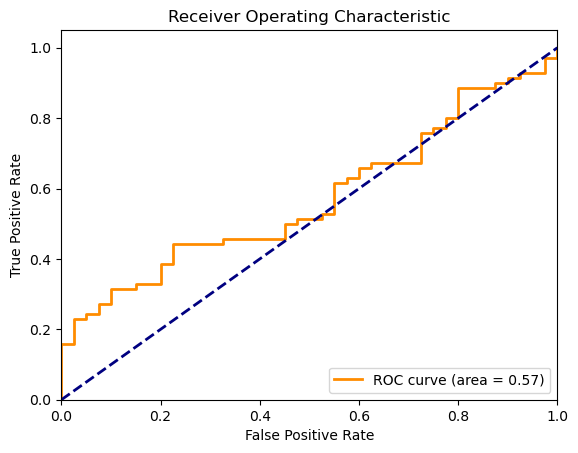

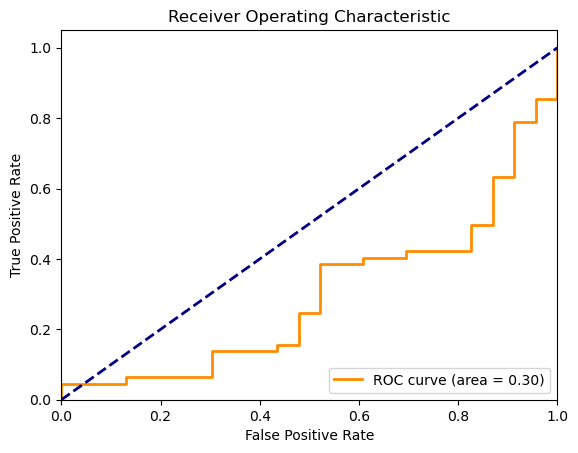

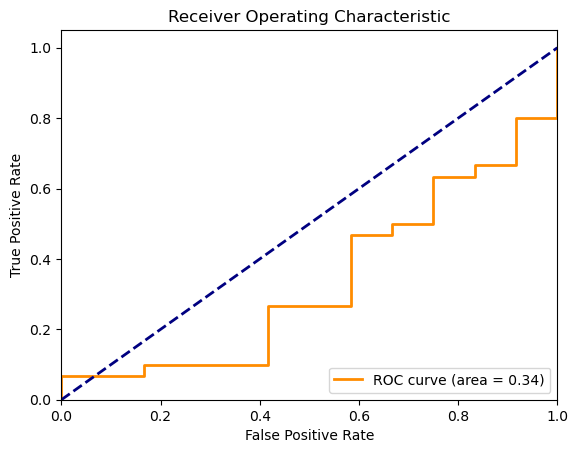

In [55]:
def calculate_reconstruction_error(output, target):
    """
    Calcule l'erreur de reconstruction (MSE) pour la détection d'anomalie.
    """
    # Utilisation de la MSE pour l'erreur de reconstruction
    reconstruction_error = F.mse_loss(output, target, reduction='none')
    return reconstruction_error.view(reconstruction_error.size(0), -1).sum(dim=1)

def evaluate_anomaly_detection_with_threshold(model, test_loader, device=device, percentile=95):
    model.eval()

    all_errors = []
    all_labels = []
    
    # Collecte des erreurs de reconstruction
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Reconstruction de l'image
            output, _ = model(images)
            
            # Calcul de l'erreur de reconstruction
            errors = calculate_reconstruction_error(output, images)
            all_errors.extend(errors.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Définir un seuil basé sur les percentiles des erreurs des images normales
    normal_errors = np.array(all_errors)[np.array(all_labels) == 0]  # Erreurs des images normales
    threshold = np.percentile(normal_errors, percentile)  # Seuil à partir des percentiles

    # Appliquer le seuil pour déterminer les anomalies
    predicted_labels = np.array(all_errors) > threshold

    return np.array(all_errors), np.array(all_labels), predicted_labels, threshold

def plot_roc_curve_with_threshold(errors, labels, predicted_labels):
    """
    Affiche la courbe ROC en tenant compte du seuil de reconstruction.
    """
    fpr, tpr, thresholds = roc_curve(labels, errors)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

lmod = [colorization_model_bottle, colorization_model_hazelnut, colorization_model_capsule, colorization_model_toothbrush]
ltest = [test_loader_bottle, test_loader_hazelnut, test_loader_capsule, test_loader_toothbrush]

# Exemple d'utilisation
for i in range(len(lmod)):
    errors, labels, predicted_labels, threshold = evaluate_anomaly_detection_with_threshold(lmod[i], ltest[i], device, percentile=95)
    plot_roc_curve_with_threshold(errors, labels, predicted_labels)




Calcul des courbes ROC et AUROC pour bottle


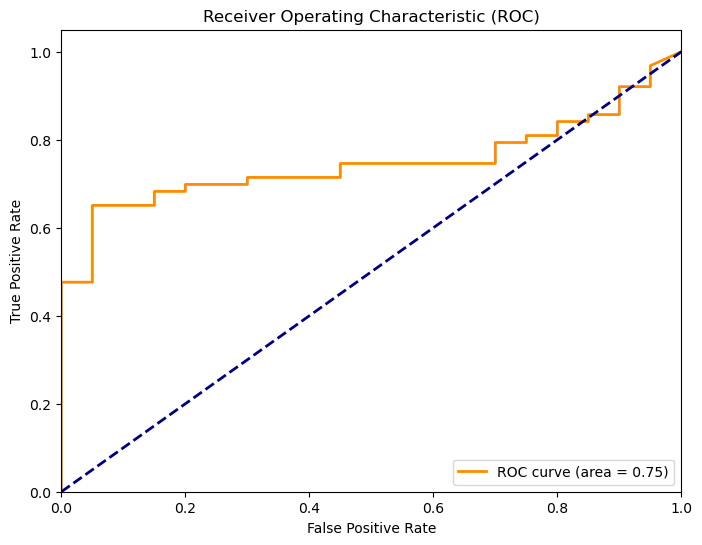

AUROC: 0.75
Calcul des courbes ROC et AUROC pour hazelnut


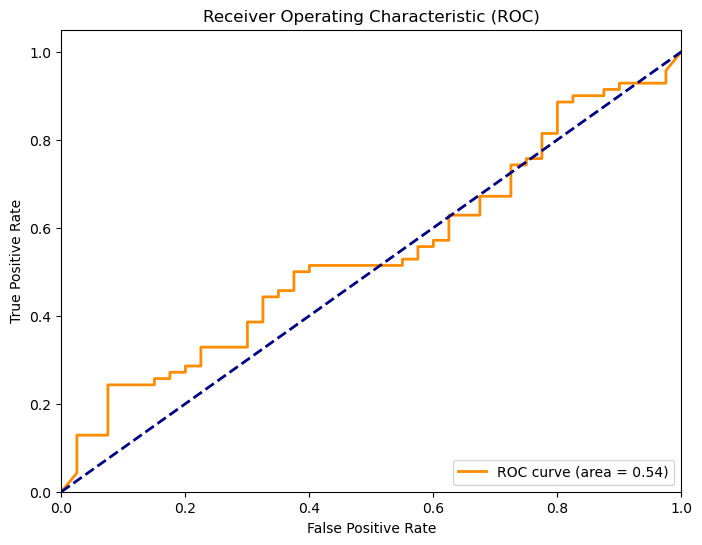

AUROC: 0.54
Calcul des courbes ROC et AUROC pour capsule


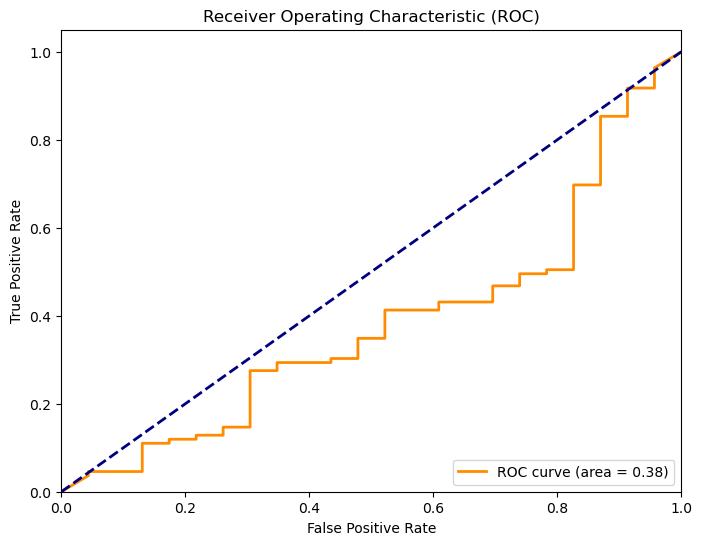

AUROC: 0.38
Calcul des courbes ROC et AUROC pour toothbrush


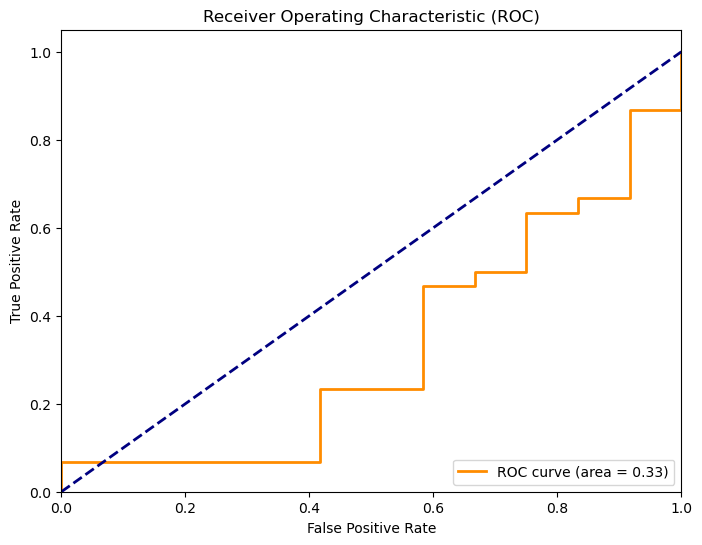

AUROC: 0.33


(array([0.        , 0.        , 0.41666667, 0.41666667, 0.58333333,
        0.58333333, 0.66666667, 0.66666667, 0.75      , 0.75      ,
        0.83333333, 0.83333333, 0.91666667, 0.91666667, 1.        ,
        1.        , 1.        ]),
 array([0.        , 0.06666667, 0.06666667, 0.23333333, 0.23333333,
        0.46666667, 0.46666667, 0.5       , 0.5       , 0.63333333,
        0.63333333, 0.66666667, 0.66666667, 0.86666667, 0.86666667,
        0.93333333, 1.        ]),
 0.3277777777777778)

In [51]:
cmodel =     
# Appel pour le modèle "bottle"
print("Calcul des courbes ROC et AUROC pour bottle")
compute_roc_and_auc(colorization_model_bottle, test_loader_bottle, device)


# Appel pour le modèle "hazelnut"
print("Calcul des courbes ROC et AUROC pour hazelnut")
compute_roc_and_auc(colorization_model_hazelnut, test_loader_hazelnut, device)

# Appel pour le modèle "capsule"
print("Calcul des courbes ROC et AUROC pour capsule")
compute_roc_and_auc(colorization_model_capsule, test_loader_capsule, device)

# Appel pour le modèle "toothbrush"
print("Calcul des courbes ROC et AUROC pour toothbrush")
compute_roc_and_auc(colorization_model_toothbrush, test_loader_toothbrush, device)

NaN detected in loss!
NaN detected in loss!
NaN detected in loss!
NaN detected in loss!
NaN detected in loss!
NaN detected in loss!
NaN detected in loss!
NaN detected in validation loss!
NaN detected in validation loss!


KeyboardInterrupt: 